<a href="https://colab.research.google.com/github/Yashithi98/Machine-Learning/blob/main/Reinforcement_Learning_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Reinforcement Learning Example

**Importing Packages**

In [ ]:
import numpy as np
import pylab as plt
import networkx as nx

**Defining Points - Mapping Cells**





In [ ]:
pointList = [(0,1), (1,5), (5,6), (5,4), (1,2), (2,3), (2,7)]

**Visualizing the Data**

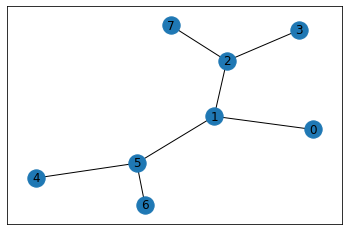

In [ ]:
destination = 7

G=nx.Graph()
G.add_edges_from(pointList)
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G,pos)
nx.draw_networkx_edges(G,pos)
nx.draw_networkx_labels(G,pos)
plt.show()

**Initializing Reward Matrix**

In [ ]:
# Size of Matrix
SIZE = 8

# Creating Matrix of (-1) 
R = np.matrix(np.ones(shape=(SIZE, SIZE)))
R *= -1

# Initializing zeros to existing paths and 100 to the destination point
for point in pointList:
    print(point)
    if point[1] == destination:
        R[point] = 100
    else:
        R[point] = 0

    if point[0] == destination:
        R[point[::-1]] = 100
    else:
        # reverse of point
        R[point[::-1]]= 0

# Destination to Destination value
R[destination:,destination]= 100

(0, 1)
(1, 5)
(5, 6)
(5, 4)
(1, 2)
(2, 3)
(2, 7)


In [ ]:
R

matrix([[ -1.,   0.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.],
        [  0.,  -1.,   0.,  -1.,  -1.,   0.,  -1.,  -1.],
        [ -1.,   0.,  -1.,   0.,  -1.,  -1.,  -1., 100.],
        [ -1.,  -1.,   0.,  -1.,  -1.,  -1.,  -1.,  -1.],
        [ -1.,  -1.,  -1.,  -1.,  -1.,   0.,  -1.,  -1.],
        [ -1.,   0.,  -1.,  -1.,   0.,  -1.,   0.,  -1.],
        [ -1.,  -1.,  -1.,  -1.,  -1.,   0.,  -1.,  -1.],
        [ -1.,  -1.,   0.,  -1.,  -1.,  -1.,  -1., 100.]])

**Q-Learning**

In [ ]:
Q = np.matrix(np.zeros([SIZE,SIZE]))

# Learning Rate
gamma = 0.8

initial_state = 1
def available_actions(state):
    current_state_row = R[state,]
    av_act = np.where(current_state_row >= 0)[1]
    return av_act

available_act = available_actions(initial_state)

def sample_next_action(available_actions_range):
    next_action = int(np.random.choice(available_act,1))
    return next_action

action = sample_next_action(available_act)

def update(current_state, action, gamma):

  max_index = np.where(Q[action,] == np.max(Q[action,]))[1]

  if max_index.shape[0] > 1:
      max_index = int(np.random.choice(max_index, size = 1))
  else:
      max_index = int(max_index)
  max_value = Q[action, max_index]

  Q[current_state, action] = R[current_state, action] + gamma * max_value
  print('max_value', R[current_state, action] + gamma * max_value)

  if (np.max(Q) > 0):
    return(np.sum(Q/np.max(Q)*100))
  else:
    return (0)

update(initial_state, action, gamma)



max_value 0.0


0

**Training**

In [ ]:
scores = []
for i in range(600):
    current_state = np.random.randint(0, int(Q.shape[0]))
    available_act = available_actions(current_state)
    action = sample_next_action(available_act)
    score = update(current_state,action,gamma)
    scores.append(score)
    print ('Score:', str(score))

print("Trained Q matrix:")
print(Q/np.max(Q)*100)



max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 100.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 180.0
Score: 155.55555555555554
max_value 0.0
Score: 155.55555555555554
max_value 180.0
Score: 200.0
max_value 0.0
Score: 200.0
max_value 0.0
Score: 200.0
max_value 0.0
Score: 200.0
max_value 0.0
Score: 200.0
max_value 0.0
Score: 200.0
max_value 0.0
Score: 200.0
max_value 0.0
Score: 200.0
max_value 244.0
Score: 173.77049180327867
max_value 0.0
Score: 173.77049180327867
max_value 0.0
Score: 173.77049180327867
max_value 0.0
Score: 173.77049180327867
max_value

In [ ]:
Q

matrix([[  0.        , 319.68308735,   0.        ,   0.        ,
           0.        ,   0.        ,   0.        ,   0.        ],
        [255.74646988,   0.        , 399.60385919,   0.        ,
           0.        , 254.48884273,   0.        ,   0.        ],
        [  0.        , 318.11105341,   0.        , 319.68308735,
           0.        ,   0.        ,   0.        , 499.50482398],
        [  0.        ,   0.        , 399.60385919,   0.        ,
           0.        ,   0.        ,   0.        ,   0.        ],
        [  0.        ,   0.        ,   0.        ,   0.        ,
           0.        , 255.74646988,   0.        ,   0.        ],
        [  0.        , 319.68308735,   0.        ,   0.        ,
         204.5971759 ,   0.        , 201.84852095,   0.        ],
        [  0.        ,   0.        ,   0.        ,   0.        ,
           0.        , 255.74646988,   0.        ,   0.        ],
        [  0.        ,   0.        , 399.60385919,   0.        ,
           0.     

**Finding the Optimal Solution**

In [ ]:
current_state = 0
steps = [current_state]

while current_state != 7:

    next_step_index = np.where(Q[current_state,]
        == np.max(Q[current_state,]))[1]

    if next_step_index.shape[0] > 1:
        next_step_index = int(np.random.choice(next_step_index, size = 1))
    else:
        next_step_index = int(next_step_index)

    steps.append(next_step_index)
    current_state = next_step_index

**Results**

Most Efficient Path:
[0, 1, 2, 7]


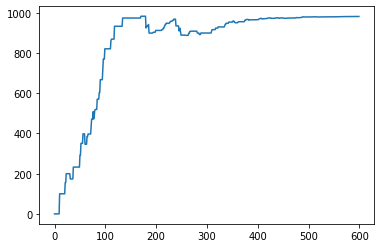

In [ ]:
print("Most Efficient Path:")
print(steps)

plt.plot(scores)
plt.show()